# Notebook imports all the packages

In [44]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1

## $f(x) = x^2 + x + 1$

In [45]:
def f(x):
    return x**2 + x + 1

In [46]:
# Make Data
x_1 = np.linspace(start = -3, stop = 3, num = 10)

In [47]:
x_1

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

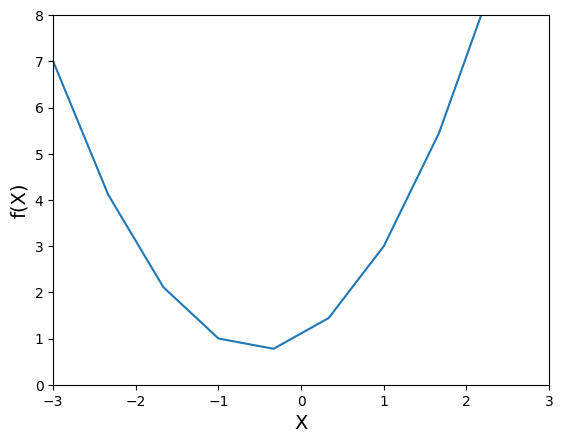

In [48]:
# Plot

plt.xlim([-3,3])
plt.ylim(0,8)

plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)

plt.plot(x_1, f(x_1))
plt.show()

## Slopes and Derivatives

In [49]:
def df(x):
    return 2*x + 1

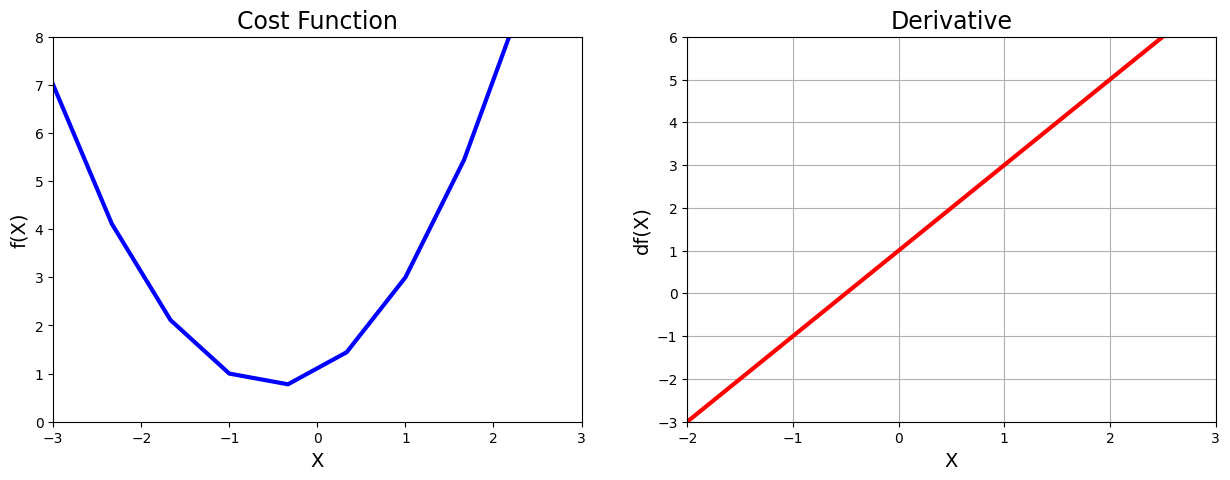

In [50]:
# Plot Function and Derivative side by side 

plt.figure(figsize = [15,5])

#Chart 1: Cost Function
plt.subplot(1, 2, 1)  # rows, columns , Index
plt.title("Cost Function", fontsize = 17)

plt.xlim([-3,3])
plt.ylim(0,8)

plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.plot(x_1, f(x_1), color = 'b', linewidth = 3)

# Chart 2: Derivative
plt.subplot(1, 2, 2) 
plt.title("Derivative", fontsize = 17)

plt.grid()
plt.xlim([-2,3])
plt.ylim(-3,6)

plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)

plt.plot(x_1, df(x_1), color = 'r', linewidth = 3)

plt.show()

# Python Loops & Gradient Descent 

In [51]:
# Python for loop
# for n in range(5):
#     print()

In [52]:
new_x = 3
prev_x = 0
step_multiplier = 0.1
precision = 0.0001

new_x_list = [new_x]
slope_list = [df(prev_x)]


for n in range(500):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - step_multiplier * gradient
    
    step_size = abs(new_x - prev_x)
    
    new_x_list.append(new_x)
    slope_list.append(df(new_x))
    
#     print(step_size)
    if step_size < precision:
        print("Loop ran: ", n, " times")
        break
        
print("Local min: ", new_x)
print("Slope of df(x) value at this point is: ", df(new_x))
print("f(x) value or cost at this point is: ", f(new_x))

Loop ran:  40  times
Local min:  -0.49962781616118024
Slope of df(x) value at this point is:  0.0007443676776395236
f(x) value or cost at this point is:  0.7500001385208099


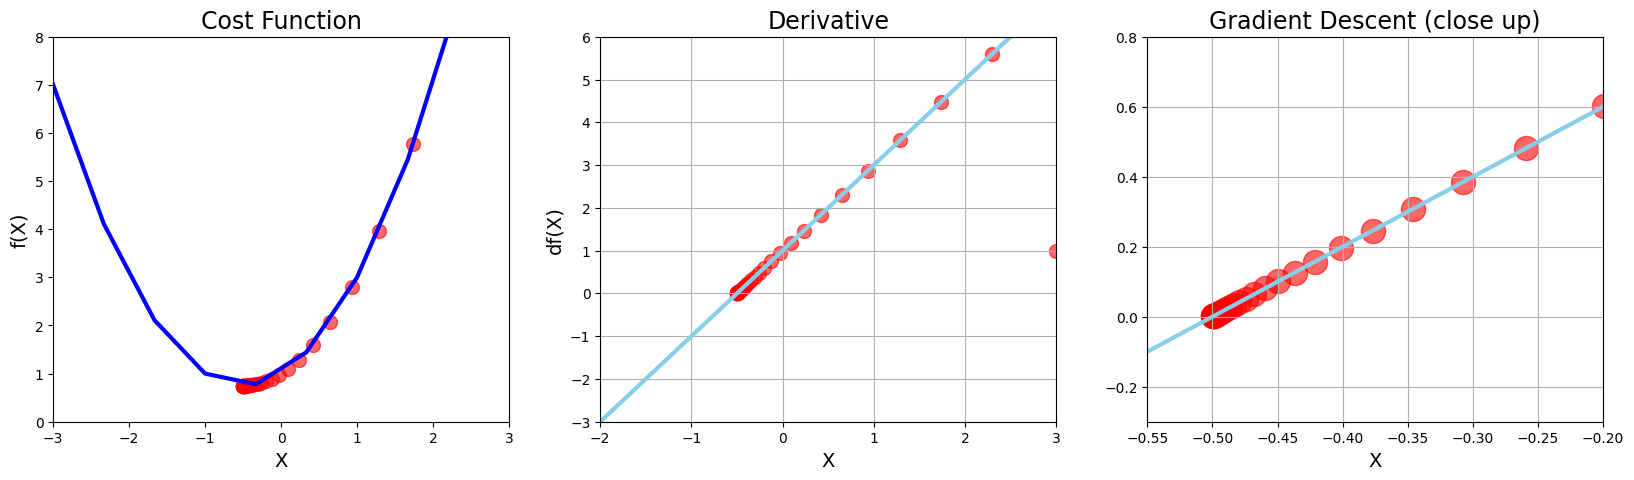

In [53]:
# Super Impose the Gradient Descent calculations on plot 

plt.figure(figsize = [20,5])

#Chart 1: Cost Function
plt.subplot(1, 3, 1)  # rows, columns , Index
plt.title("Cost Function", fontsize = 17)

plt.xlim([-3,3])
plt.ylim(0,8)

plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.plot(x_1, f(x_1), color = 'b', linewidth = 3)

values = np.array(new_x_list)
plt.scatter(new_x_list, f(values), color = "red", s = 100, alpha = 0.6)

# Chart 2: Derivative
plt.subplot(1, 3, 2) 
plt.title("Derivative", fontsize = 17)

plt.grid()
plt.xlim([-2,3])
plt.ylim(-3,6)

plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)


plt.scatter(new_x_list, slope_list, color = "red", s = 100, alpha = 0.6)



# Chart 3: Gradient Descent (close up)
plt.subplot(1, 3, 3) 
plt.title("Gradient Descent (close up)", fontsize = 17)

plt.grid()
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)

plt.xlabel('X', fontsize = 14)
# plt.ylabel('df(X)', fontsize = 14)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)


plt.scatter(new_x_list, slope_list, color = "red", s = 300, alpha = 0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

$$ g(x) = x^4 - 4x^2 + 5 $$

In [54]:
import numpy as np

# Make some data 
x_2 = np.linspace(-2,2,100)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x



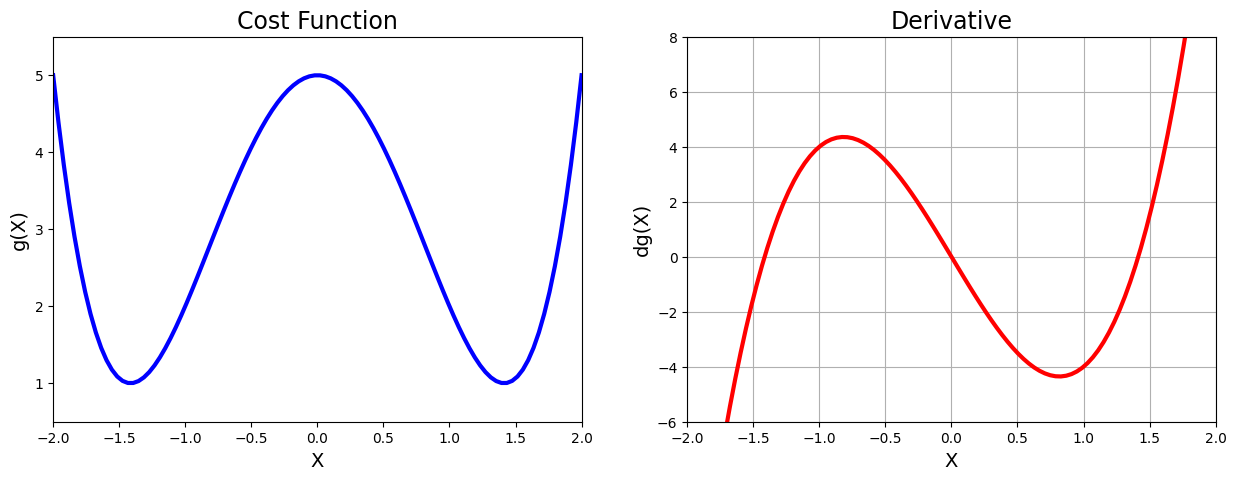

In [55]:
# Plot Function and Derivative side by side 

plt.figure(figsize = [15,5])

#Chart 1: Cost Function
plt.subplot(1, 2, 1)  # rows, columns , Index
plt.title("Cost Function", fontsize = 17)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.xlabel('X', fontsize = 14)
plt.ylabel('g(X)', fontsize = 14)
plt.plot(x_2, g(x_2), color = 'b', linewidth = 3)

# Chart 2: Derivative
plt.subplot(1, 2, 2) 
plt.title("Derivative", fontsize = 17)

plt.grid()
plt.xlim([-2,2])
plt.ylim(-6,8)

plt.xlabel('X', fontsize = 14)
plt.ylabel('dg(X)', fontsize = 14)

plt.plot(x_2, dg(x_2), color = 'r', linewidth = 3)

plt.show()

## Gradient Descent vs Python Function

In [56]:
def gradient_descent(der_func, initial_guess, multiplier = 0.02, precision = 0.001,max_iter = 500):
    new_x = initial_guess
    new_x_list = [new_x]
    slope_list = [der_func(new_x)]
    for n in range(max_iter):
        prev_x = new_x
        gradient = der_func(prev_x)
        new_x = prev_x - multiplier * gradient
        step_size = abs(new_x - prev_x)
        new_x_list.append(new_x)
        slope_list.append(der_func(new_x))
        
    #     print(step_size)
        if step_size < precision:
            # print("Loop ran: ", n, " times")
            break
    # print("Local min: ", new_x)
    # print("Slope of df(x) value at this point is: ", der_func(new_x))
    # print("f(x) value or cost at this point is: ", f(new_x))

    return new_x, new_x_list, slope_list



In [57]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)

print("Local min: ", local_min)
print("Number of steps: ", len(list_x))

Local min:  1.4122375085019094
Number of steps:  23


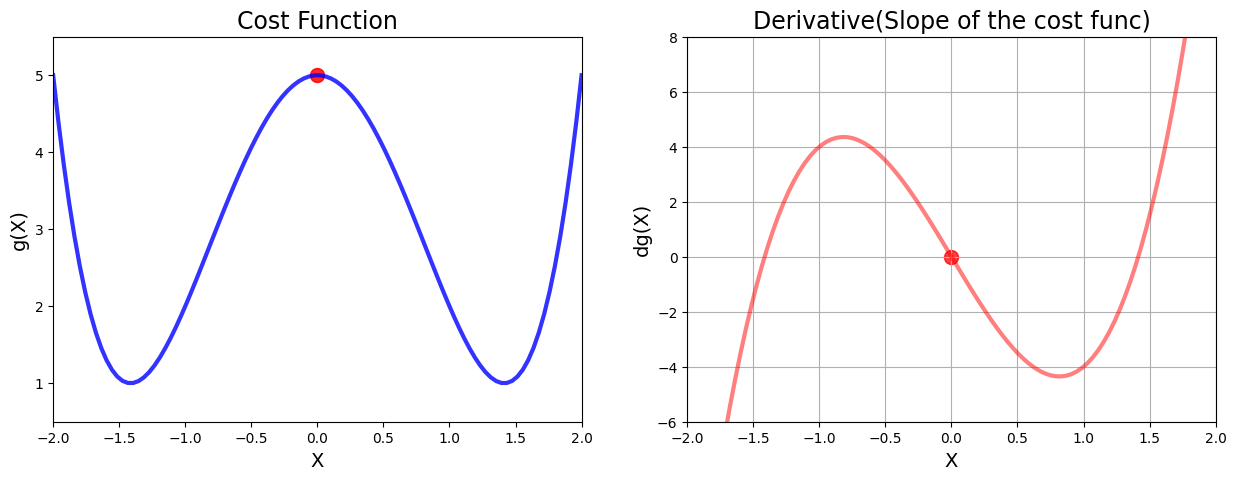

In [58]:
#Calling Gradient Descent Function
local_min, list_x, deriv_list = gradient_descent(der_func=dg, initial_guess=0)


# Plot Function and Derivative side by side 

plt.figure(figsize = [15,5])

#Chart 1: Cost Function
plt.subplot(1, 2, 1)  # rows, columns , Index
plt.title("Cost Function", fontsize = 17)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.xlabel('X', fontsize = 14)
plt.ylabel('g(X)', fontsize = 14)
plt.plot(x_2, g(x_2), color = 'b', linewidth = 3, alpha = 0.8)
plt.scatter(list_x,g(np.array(list_x)), color = 'red', s = 100, alpha = 0.6)


# Chart 2: Derivative
plt.subplot(1, 2, 2) 
plt.title("Derivative(Slope of the cost func)", fontsize = 17)

plt.grid()
plt.xlim([-2,2])
plt.ylim(-6,8)

plt.xlabel('X', fontsize = 14)
plt.ylabel('dg(X)', fontsize = 14)

plt.plot(x_2, dg(x_2), color = 'r', linewidth = 3, alpha = 0.5)
plt.scatter(list_x,deriv_list, color = 'red', s = 100, alpha = 0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$

In [59]:
#Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

Local min:  1.5989534547394717
Number of steps:  117


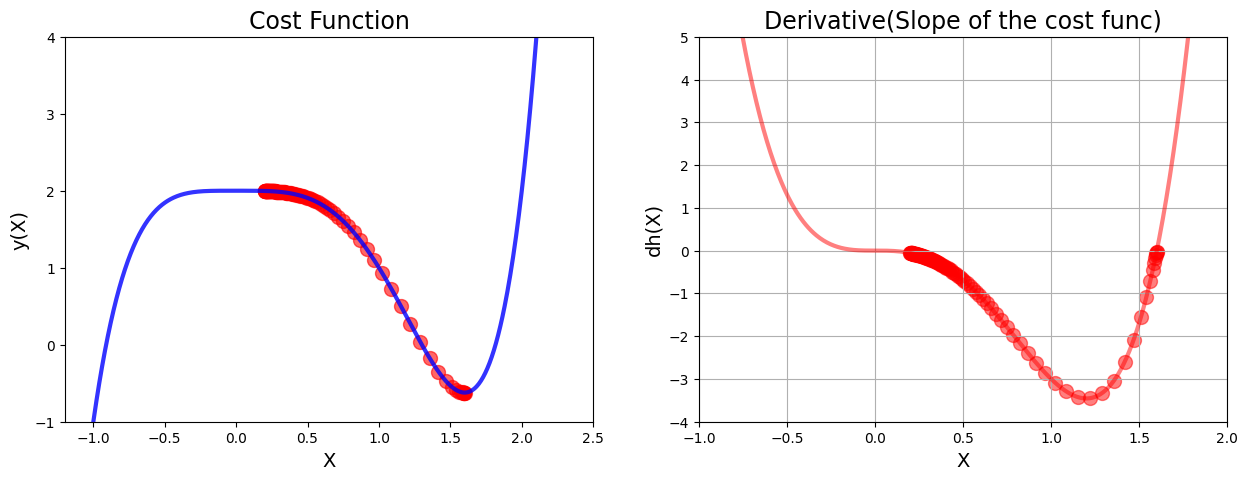

In [60]:
#Calling Gradient Descent Function
local_min, list_x, deriv_list = gradient_descent(der_func=dh, initial_guess=0.2)

print("Local min: ", local_min)
print("Number of steps: ", len(list_x))

# Plot Function and Derivative side by side 

plt.figure(figsize = [15,5])

#Chart 1: Cost Function
plt.subplot(1, 2, 1)  # rows, columns , Index
plt.title("Cost Function", fontsize = 17)

plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.xlabel('X', fontsize = 14)
plt.ylabel('y(X)', fontsize = 14)
plt.plot(x_3, h(x_3), color = 'b', linewidth = 3, alpha = 0.8)
plt.scatter(list_x,h(np.array(list_x)), color = 'red', s = 100, alpha = 0.6)


# Chart 2: Derivative
plt.subplot(1, 2, 2) 
plt.title("Derivative(Slope of the cost func)", fontsize = 17)

plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,5)

plt.xlabel('X', fontsize = 14)
plt.ylabel('dh(X)', fontsize = 14)

plt.plot(x_3, dh(x_3), color = 'r', linewidth = 3, alpha = 0.5)
plt.scatter(list_x,deriv_list, color = 'red', s = 100, alpha = 0.5)

plt.show()

In [61]:
import sys
#help(sys)
#sys.version
# type(h(local_min))
sys.float_info.max


1.7976931348623157e+308

## Learning Rate

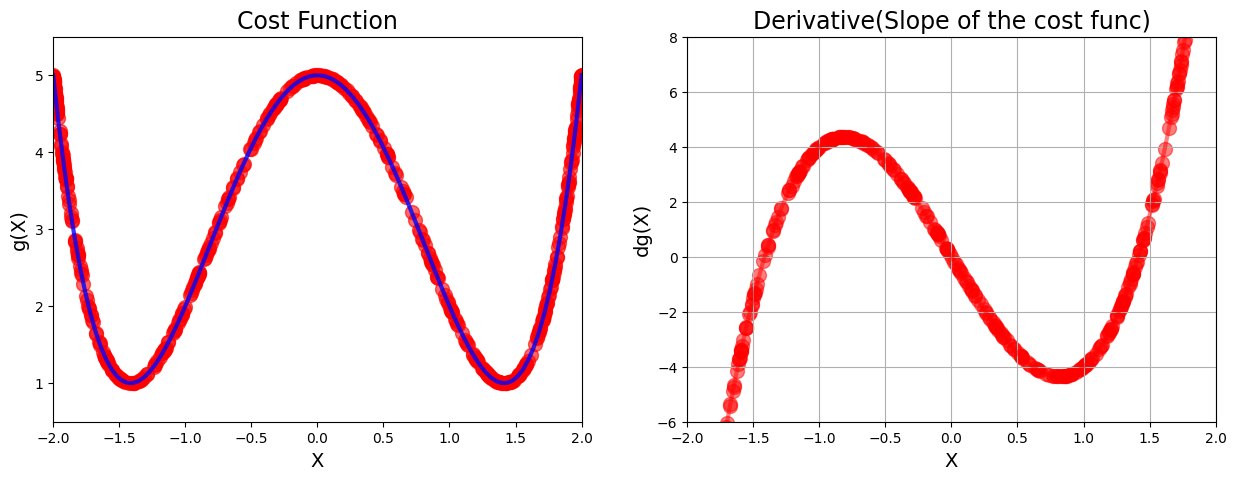

Number of steps is:  501


In [63]:
#Calling Gradient Descent Function
local_min, list_x, deriv_list = gradient_descent(der_func=dg, initial_guess=1.9, multiplier = 0.25)

# Plot Function and Derivative side by side 

plt.figure(figsize = [15,5])

#Chart 1: Cost Function
plt.subplot(1, 2, 1)  # rows, columns , Index
plt.title("Cost Function", fontsize = 17)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.xlabel('X', fontsize = 14)
plt.ylabel('g(X)', fontsize = 14)
plt.plot(x_2, g(x_2), color = 'b', linewidth = 3, alpha = 0.8)
plt.scatter(list_x,g(np.array(list_x)), color = 'red', s = 100, alpha = 0.6)


# Chart 2: Derivative
plt.subplot(1, 2, 2) 
plt.title("Derivative(Slope of the cost func)", fontsize = 17)

plt.grid()
plt.xlim([-2,2])
plt.ylim(-6,8)

plt.xlabel('X', fontsize = 14)
plt.ylabel('dg(X)', fontsize = 14)

plt.plot(x_2, dg(x_2), color = 'r', linewidth = 3, alpha = 0.5)
plt.scatter(list_x,deriv_list, color = 'red', s = 100, alpha = 0.5)

plt.show()


print("Number of steps is: ", len(list_x))